# Data to Dome workshop: Volumetric Fisheye Rendering using yt

In this tutorial we'll demonstate techniques for visualizaing simulation data. We will import a sample dataset and produce a volumetrically rendered 180 degree fisheye (domemaster) images.

To do this we will use the python package yt (http://yt-project.org). yt is a visualization and analysis package for simulation (and some observational) data. This notebooks borrows liberally from tutorials on the yt site. For more details on volume rendering in yt check these out:
* http://yt-project.org/doc/visualizing/volume_rendering.html
* http://yt-project.org/doc/cookbook/complex_plots.html

To run this notebook you'll need to make sure that yt is installed. yt is included in the Anaconda distribution, however it is not installed by default. To install yt type the following on the command line:

    >conda install -c conda-forge yt

--Mark SubbaRao, Feburary 20, 2017

In [1]:
# First let's import yt 
import yt
from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper
from yt.visualization.volume_rendering.api import Scene, VolumeSource

## Loading a Dataset
One big advantage of using yt is its ability to read many different types of simulation output formats. The yt project provides many sample simulation outputs here: http://yt-project.org/data/. We will use one snapshot from their enzo_cosmology_plus sample. This is a cosmological simiulation of a 32 Mpc box, using the AMR Adaptive Mesh Refinement code ENZO. Feel free to try this code with different simulations. 

In [2]:
ds = yt.load("data/DD0043/DD0043")

yt : [INFO     ] 2017-11-13 15:49:48,669 Parameters: current_time              = 215.81654844752
yt : [INFO     ] 2017-11-13 15:49:48,670 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2017-11-13 15:49:48,671 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-11-13 15:49:48,672 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-11-13 15:49:48,674 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-11-13 15:49:48,674 Parameters: current_redshift          = 0.062824903812594
yt : [INFO     ] 2017-11-13 15:49:48,675 Parameters: omega_lambda              = 0.732
yt : [INFO     ] 2017-11-13 15:49:48,676 Parameters: omega_matter              = 0.268
yt : [INFO     ] 2017-11-13 15:49:48,676 Parameters: hubble_constant           = 0.704


In [3]:
ds.field_list

Parsing Hierarchy : 100%|█████████████████████████████████████████████████████████| 122/122 [00:00<00:00, 16260.61it/s]
yt : [INFO     ] 2017-11-13 15:49:57,091 Gathering a field list (this may take a moment.)


[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'GasEnergy'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HeIII_Density'),
 ('enzo', 'HeII_Density'),
 ('enzo', 'HeI_Density'),
 ('enzo', 'Metal_Density'),
 ('enzo', 'Temperature'),
 ('enzo', 'TotalEnergy'),
 ('enzo', 'x-velocity'),
 ('enzo', 'y-velocity'),
 ('enzo', 'z-velocity'),
 ('io', 'creation_time'),
 ('io', 'dynamical_time'),
 ('io', 'metallicity_fraction'),
 ('io', 'particle_index'),
 ('io', 'particle_mass'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z')

yt : [INFO     ] 2017-11-13 15:50:11,516 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-11-13 15:50:11,517 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-11-13 15:50:11,519 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-11-13 15:50:11,521 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-11-13 15:50:11,530 Making a fixed resolution buffer of (('enzo', 'Dark_Matter_Density')) 800 by 800
yt : [INFO     ] 2017-11-13 15:50:11,545 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



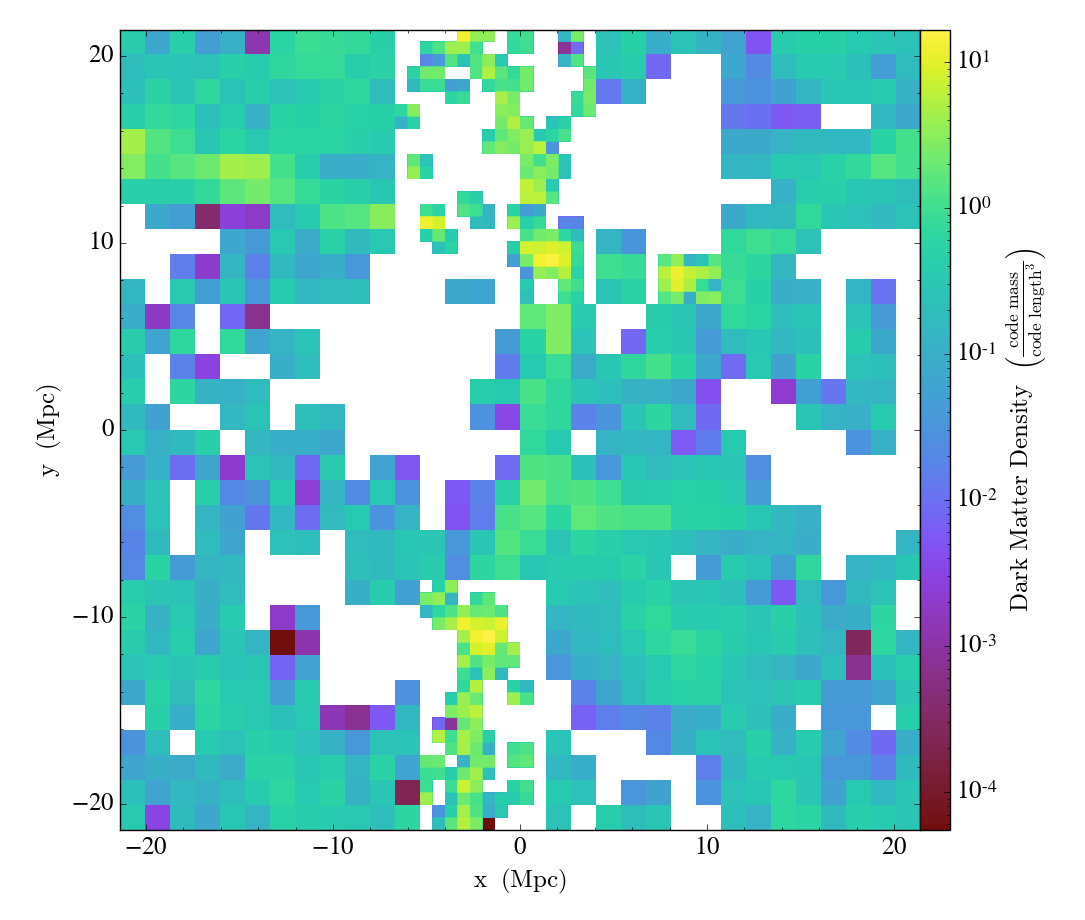
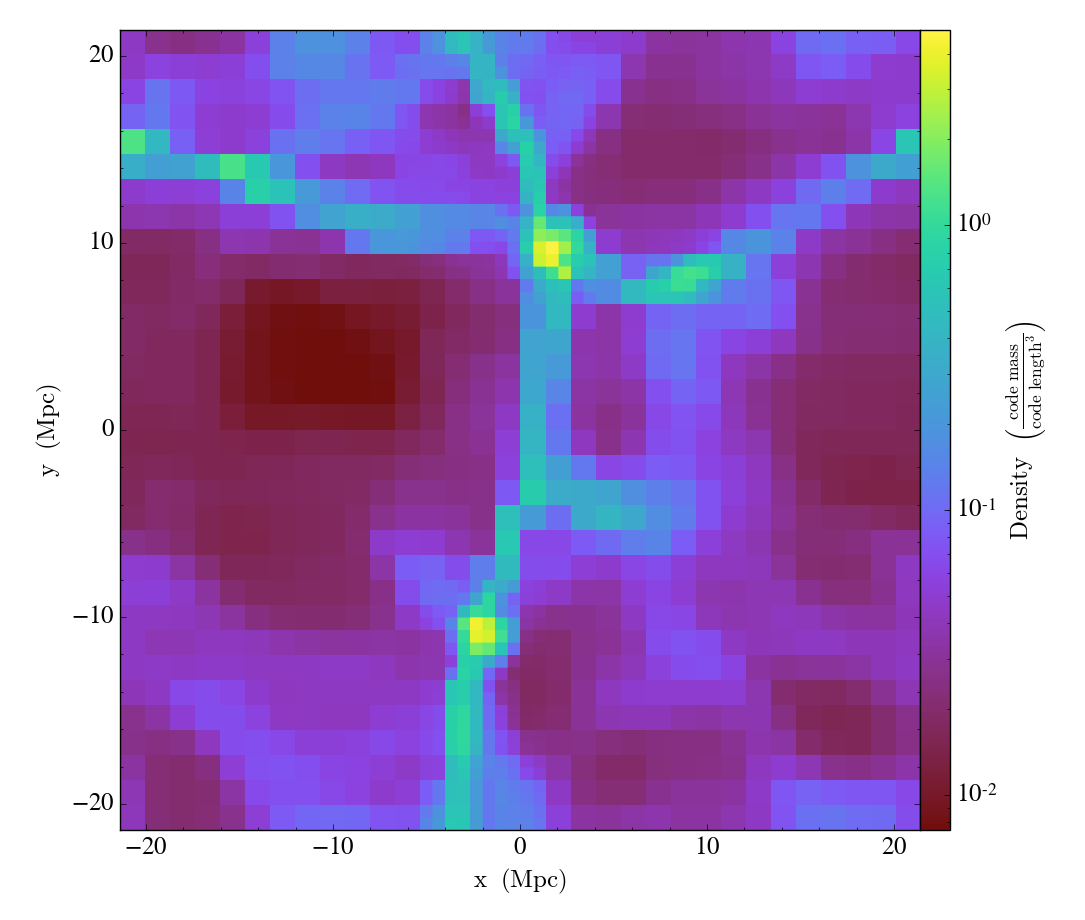

In [4]:
yt.SlicePlot(ds, 'z', ['Density','Dark_Matter_Density'])

## Volume Rendering
In volume rendering lines of sight traverse the simulation volume. We have significant control over how that integration across the line of sight is represented as color in the final image. We'll start by picking a simulation field to integrate over and do a defult render.

In [5]:
sc = yt.create_scene(ds,field="Density")

yt : [INFO     ] 2017-11-13 15:51:01,247 Rendering scene (Can take a while).
yt : [INFO     ] 2017-11-13 15:51:01,249 Creating volume
C:\Users\msubbarao\AppData\Local\Continuum\Anaconda3\lib\site-packages\yt\utilities\amr_kdtree\amr_kdtree.py:311: RuntimeWarning: invalid value encountered in log10
  dds.append(np.log10(vcd[field].astype('float64')))
yt : [INFO     ] 2017-11-13 15:51:02,300 Creating transfer function
yt : [INFO     ] 2017-11-13 15:51:02,300 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


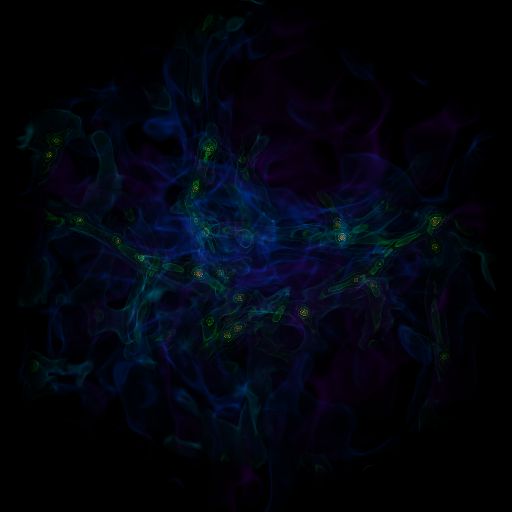

In [6]:
sc

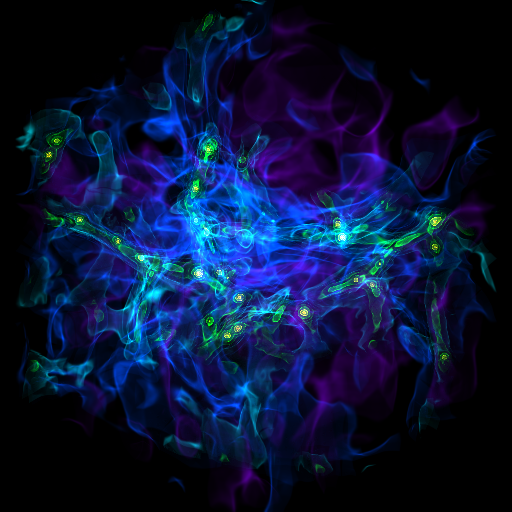

In [7]:
sc.show(sigma_clip=4.0)

In [ ]:
print (sc.camera)

## Transfer Function
The transfer function defines how color is assigned in the render. yt's default transfer function rendered a series of fuzzy isocontours. First we'll take a look at the default function, then we'll create a custon transfer funcion.

In [8]:
tf = sc.get_source(0).transfer_function
tf

<Color Transfer Function Object>:
x_bounds:[-2.2, 3.6] nbins:512 features:
	('gaussian', 'location(x):-2.1', 'width(x):0.002', 'height(y):(0.073,   0, 0.084, 0.001)')
	('gaussian', 'location(x):-1.5', 'width(x):0.002', 'height(y):(0.35,   0, 0.62, 0.0022)')
	('gaussian', 'location(x):-0.85', 'width(x):0.002', 'height(y):(  0, 0.26, 0.87, 0.0046)')
	('gaussian', 'location(x):-0.21', 'width(x):0.002', 'height(y):(  0, 0.65, 0.72, 0.01)')
	('gaussian', 'location(x):0.42', 'width(x):0.002', 'height(y):(  0, 0.6, 0.031, 0.022)')
	('gaussian', 'location(x):1.1', 'width(x):0.002', 'height(y):(  0, 0.87,   0, 0.046)')
	('gaussian', 'location(x):1.7', 'width(x):0.002', 'height(y):(0.78, 0.98,   0, 0.1)')
	('gaussian', 'location(x):2.3', 'width(x):0.002', 'height(y):(  1, 0.71,   0, 0.22)')
	('gaussian', 'location(x):  3', 'width(x):0.002', 'height(y):(0.91,   0,   0, 0.46)')
	('gaussian', 'location(x):3.6', 'width(x):0.002', 'height(y):(0.8, 0.67, 0.67,   1)')

yt : [INFO     ] 2017-11-13 15:51:58,615 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


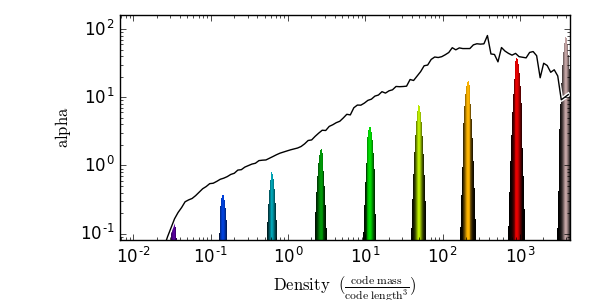

In [9]:
tfh = TransferFunctionHelper(ds)
tfh.set_field('Density')
tfh.plot(profile_field='Density')

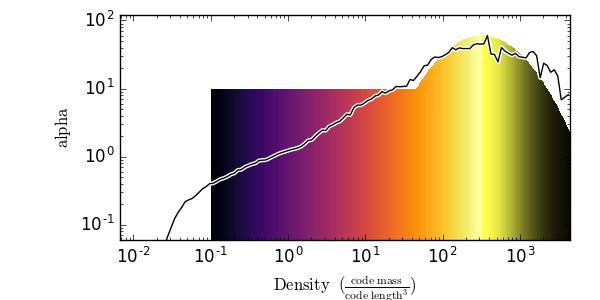

In [10]:
# Let's make a new custom Transfer Function
import numpy as np
tfh.tf.clear()
tfh.set_log(True)
#def coreBoost(vals, minval, maxval):
#    return((vals-minval)/(maxval-minval))
tfh.tf.map_to_colormap(-1.0,2.5, colormap='inferno',scale=10.0)
tfh.tf.add_gaussian(2.5, width=.4, height=[1.0, 1.0, 0.3, 60.0])
tf.grey_opacity = True
tfh.plot(profile_field='Density')

yt : [INFO     ] 2017-11-13 15:53:04,798 Rendering scene (Can take a while).


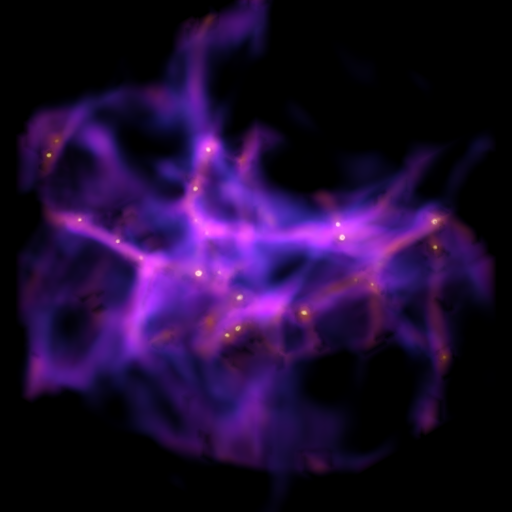

In [11]:
source = sc.get_source(0)
source.set_transfer_function(tfh.tf)
sc.render()
sc.show(sigma_clip=4.0)

## Fisheye Camera Rendering (Domemasters)

In [12]:
cam = sc.add_camera(ds, lens_type='fisheye')
sc.camera.position=[0.55,0.55,0.9]
print (sc.camera)

<Camera Object>:
	position:[ 0.55  0.55  0.9 ] unitary
	focus:[ 0.5  0.5  0.5] code_length
	north_vector:[ 0.91849775 -0.38986595 -0.06607897] dimensionless
	width:[ 1.5  1.5  1.5] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:fisheye
	viewpoint:[ 0.55  0.55  0.9 ] unitary
t	fov:180.0
	radius:1.5 code_length


yt : [INFO     ] 2017-11-13 15:53:51,161 Rendering scene (Can take a while).


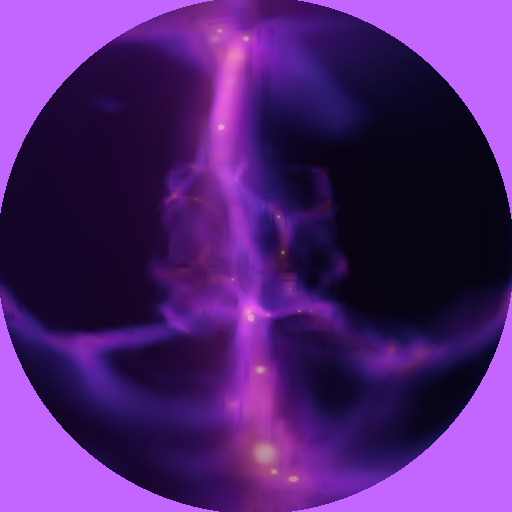

In [13]:
sc.render()
sc.show()

## Rendering a movie
Now we can use these same techniques to make a movie. All we have to do is animate the camera position and focus. To write the images to a file rather all we have to do is:
>sc.save('data/domemaster.png')

To increase the resolution of the image (for example to make 3K images for the 4D2U theater):
>sc.camera.set_resolution((3072,3072))

You could also grab some more snapshots and animate the evolution of the simulation.